# Milestone #5

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
import sqlite3

In [52]:
from sqlite3 import Error

In [53]:
# Create a SQL connection to our SQLite database
conn = sqlite3.connect("WeatherProject.db")

In [54]:
cursor = conn.cursor()

In [55]:
# Be sure to close the connection
# conn.close()

# All Data Visualizations Below


In [56]:
# Start of new merged dataframe
columns = ["City", "Current Temp", "Average Temp"]
data = []

In [57]:
# Code suggested from book
# not sure if it's needed
cursor.execute("PRAGMA foregin_keys = 1")

In [58]:
# Query to join CurrentWeather and AverageTemperatures on City

sql = '''SELECT CurrentWeather.City, Temperature, Aug FROM CurrentWeather
INNER JOIN AverageTemperatures ON AverageTemperatures.City = CurrentWeather.City'''

In [59]:
rows = cursor.execute(sql)

In [60]:
for row in rows:
    data.append(row)

In [61]:
# Create a dataframe from my query
df1 = pd.DataFrame(data, columns = columns)

In [62]:
# view the df
df1

,City,Current Temp,Average Temp
0,Los Angeles,83.48,74.30
1,Chicago,78.49,72.32
2,Houston,75.87,84.20
3,Philadelphia,90.21,76.46
4,San Antonio,90.41,85.46
5,San Diego,70.63,71.96
6,Dallas,87.13,85.64
7,San Francisco,59.90,62.42
8,Indianapolis,70.90,74.30
9,Seattle,62.47,65.84


In [63]:
df1.shape

(30, 3)

## Data Visualization #1 - Merged DF
#### There are two different bar plots showing the same data because I wanted to practice creating both vertical and horizontal bars.

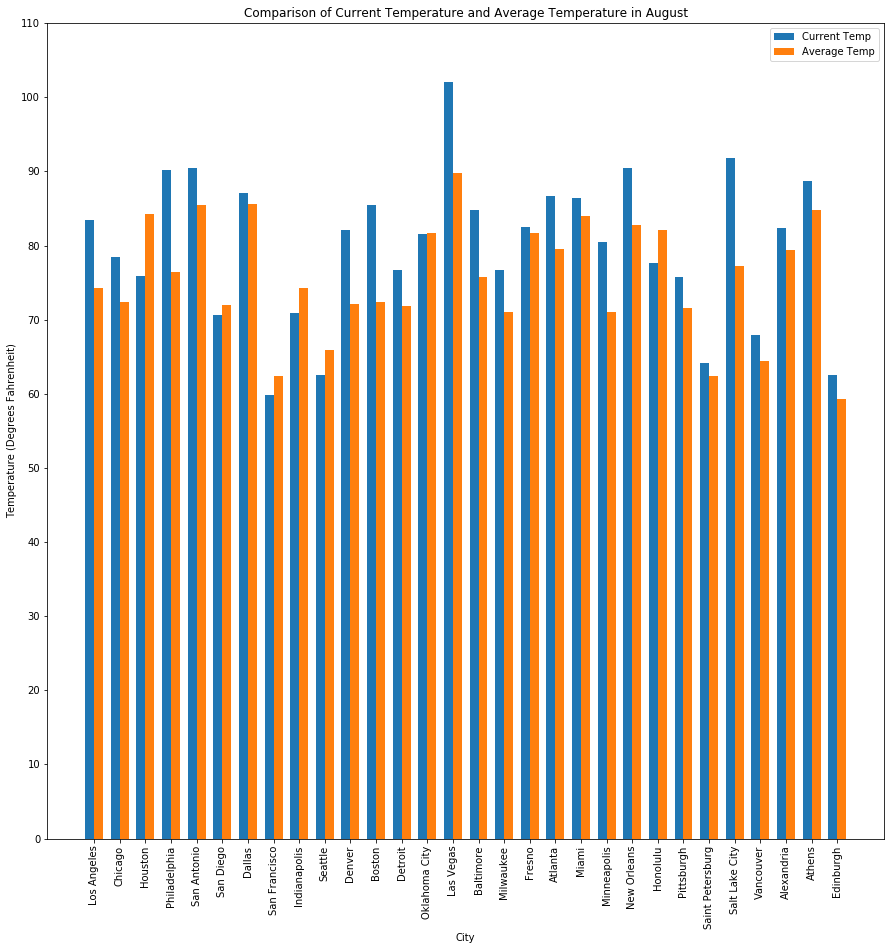

In [64]:
# Vertical bar plot
# Current Weather (Aug. 2) and Average August Temp being compared 


indx = np.arange(len(df1['City']))
temp_label = np.arange(0, 120, 10)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(15, 15))
current = ax.bar(indx - bar_width/2, df1['Current Temp'], bar_width, label = "Current Temp")
average = ax.bar(indx + bar_width/2, df1['Average Temp'], bar_width, label = "Average Temp")
# insert x-axis label
ax.set_xticks(indx)
ax.set_xticklabels(df1['City'], rotation = 'vertical')
# insert y-axis label
ax.set_yticks(temp_label)
ax.set_yticklabels(temp_label)
# insert legend
ax.set(xlabel="City", ylabel="Temperature (Degrees Fahrenheit)", title = 'Comparison of Current Temperature and Average Temperature in August')
ax.legend()

plt.show()

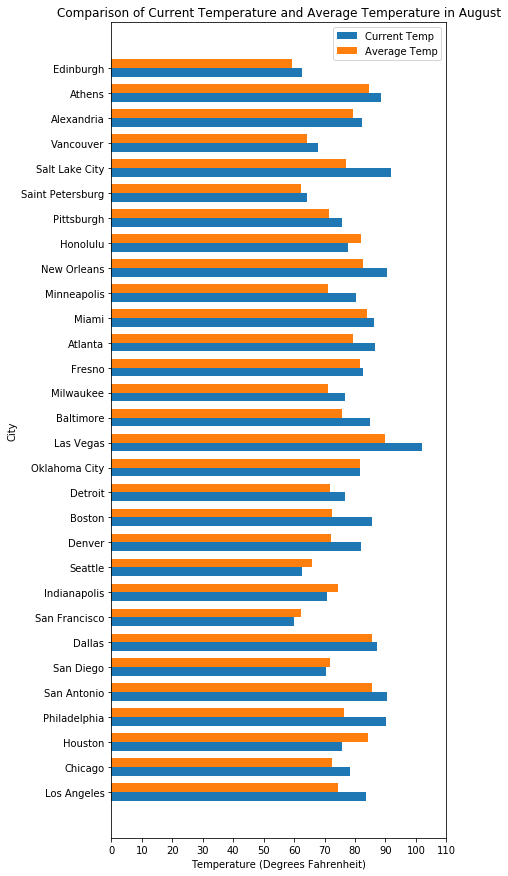

In [65]:
# Data Visualization #1 - Merged DF
# horizonal bar plot

indx = np.arange(len(df1['City']))
temp_label = np.arange(0, 120, 10)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(6, 15))
current = ax.barh(indx - bar_width/2, df1['Current Temp'], bar_width, label = "Current Temp")
average = ax.barh(indx + bar_width/2, df1['Average Temp'], bar_width, label = "Average Temp")
# insert x-axis label
ax.set_xticks(temp_label)
ax.set_xticklabels(temp_label)
# insert y-axis label
ax.set_yticks(indx)
ax.set_yticklabels(df1['City'])
# insert legend
ax.set(ylabel="City", xlabel="Temperature (Degrees Fahrenheit)", title = 'Comparison of Current Temperature and Average Temperature in August')
ax.legend()

plt.show()

# Data Visualization #2 - Single df

In [66]:
# Find data for Milwaukee, WI (close to where I live!)
cursor = conn.cursor()
df3 = pd.read_sql_query("SELECT * FROM AverageTemperatures WHERE City == 'Milwaukee';", conn)

In [67]:
df3

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg_Temp_Yr,Continent
0,United States,Milwaukee,22.64,26.24,35.42,46.04,55.94,66.56,72.14,71.06,63.32,51.62,39.38,26.78,48.02,North America


In [68]:
df3.unstack()

Country      0    United States
City         0        Milwaukee
Jan          0            22.64
Feb          0            26.24
Mar          0            35.42
Apr          0            46.04
May          0            55.94
Jun          0            66.56
Jul          0            72.14
Aug          0            71.06
Sep          0            63.32
Oct          0            51.62
Nov          0            39.38
Dec          0            26.78
Avg_Temp_Yr  0            48.02
Continent    0    North America
dtype: object

In [69]:
col = ['Month', 'AvgTemp']

In [70]:
# Create dict with Milwaukee's info
d= {'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],'AvgTemp': [22.64, 26.24, 35.42, 46.04, 55.94, 66.56, 72.14, 71.06, 63.32, 51.62, 39.38, 26.78]}

In [71]:
# create df out of dict 
mil = pd.DataFrame(d, columns = col)

In [72]:
# View the data for Milwaukee
mil

,Month,AvgTemp
0,Jan,22.64
1,Feb,26.24
2,Mar,35.42
3,Apr,46.04
4,May,55.94
5,Jun,66.56
6,Jul,72.14
7,Aug,71.06
8,Sep,63.32
9,Oct,51.62


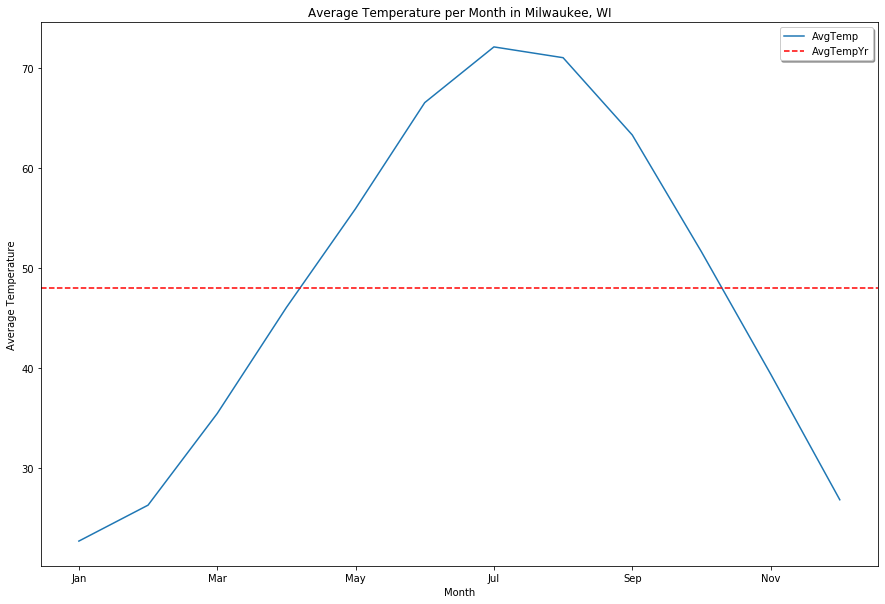

In [73]:
# Line graph of average temps per month in Milwaukee
# Red line = avg yearly temp

mil.plot(kind='line', x= 'Month', y='AvgTemp',figsize=(15, 10))
plt.title("Average Temperature per Month in Milwaukee, WI")
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.axhline(48.02, color='r', linestyle='--', label = 'AvgTempYr')
plt.legend(loc='best', shadow=True)
plt.show()

# Data Visualization # 3 - Merged df

In [74]:
# Line graph displaying average temp, current temp, and feels like temp

In [75]:
# Query the necessary data
# Need to use back ticks when column name has spaces

cursor = conn.cursor()
df2 = pd.read_sql_query("SELECT CurrentWeather.City, Temperature, `Feels Like Temp`, Aug FROM CurrentWeather INNER JOIN AverageTemperatures ON AverageTemperatures.City = CurrentWeather.City;", conn)

In [76]:
df2.head()

,City,Temperature,Feels Like Temp,Aug
0,Los Angeles,83.48,84.81,74.30
1,Chicago,78.49,78.66,72.32
2,Houston,75.87,81.01,84.20
3,Philadelphia,90.21,94.01,76.46
4,San Antonio,90.41,96.33,85.46


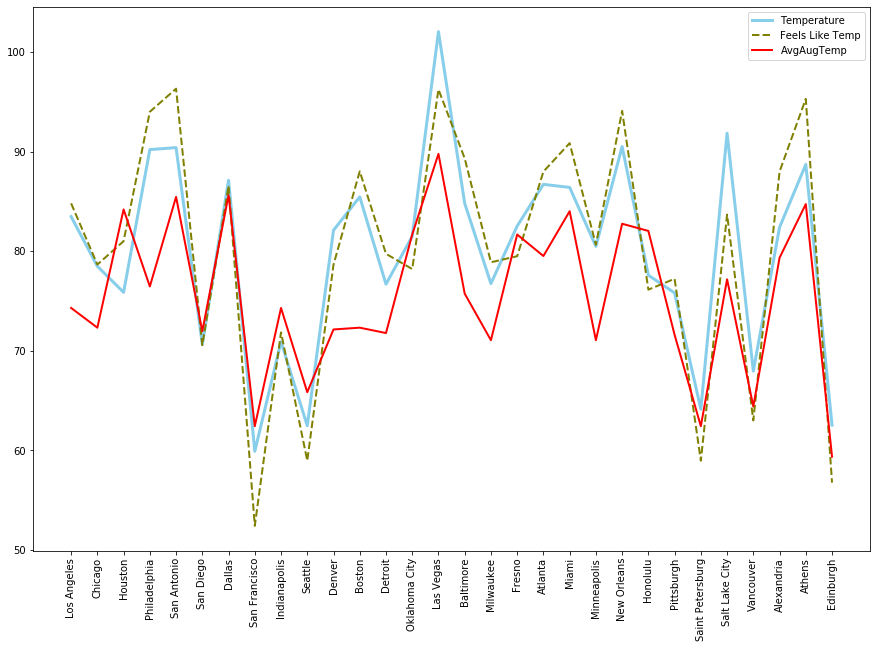

In [103]:
# Create line graph
plt.figure(figsize=(15,10))
plt.plot('City', 'Temperature', data=df2, color='skyblue', linewidth=3)
plt.plot('City', 'Feels Like Temp', data=df2, color='olive', linewidth=2, linestyle='dashed')
plt.plot('City', 'Aug', data=df2, marker='', color='red', linewidth=2, label="AvgAugTemp")
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()


# Data Visualization #4 - Single df


In [78]:
# New query
cursor = conn.cursor()
us = pd.read_sql_query("SELECT * FROM AverageTemperatures WHERE Country == 'United States';", conn)

In [79]:
us.shape

(52, 16)

In [80]:
us.head(10)

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg_Temp_Yr,Continent
0,United States,"Albuquerque, New Mexico",36.32,41.36,48.02,55.94,65.66,74.84,78.26,76.28,69.26,57.56,44.96,36.32,57.20,North America
1,United States,"Anchorage, Alaska",17.06,20.12,26.60,36.86,47.84,55.22,58.82,56.66,48.56,34.88,22.28,19.04,37.04,North America
2,United States,Atlanta,43.52,47.48,54.68,62.06,70.34,77.36,80.42,79.52,73.58,63.32,54.14,45.50,62.60,North America
3,United States,"Austin, Texas",51.44,55.04,61.70,69.26,76.64,82.22,84.92,85.82,80.06,71.24,60.98,52.52,69.26,North America
4,United States,Baltimore,33.44,36.32,44.24,54.32,63.68,73.04,77.54,75.74,68.36,56.66,46.94,37.22,55.58,North America
5,United States,"Boise, Idaho",31.28,36.50,44.42,50.72,59.18,67.46,75.74,74.66,64.94,52.88,39.92,30.74,52.52,North America
6,United States,Boston,29.30,32.00,38.66,48.38,58.28,68.00,73.76,72.32,65.12,54.32,44.96,35.06,51.62,North America
7,United States,"Charlotte, North Carolina",41.18,44.96,52.34,60.44,68.54,76.46,79.52,78.44,71.96,61.34,51.98,43.34,60.98,North America
8,United States,Chicago,23.72,27.68,37.76,48.92,59.00,68.90,73.94,72.32,64.58,52.52,40.28,27.68,49.64,North America
9,United States,"Columbus, Ohio",29.12,32.36,41.54,52.70,62.24,71.24,74.84,73.58,66.38,54.68,44.06,33.08,53.06,North America


In [81]:
# Average yearly temperature for all US cities
mean_temp = us['Avg_Temp_Yr'].mean()
print(mean_temp)

59.61615384615386


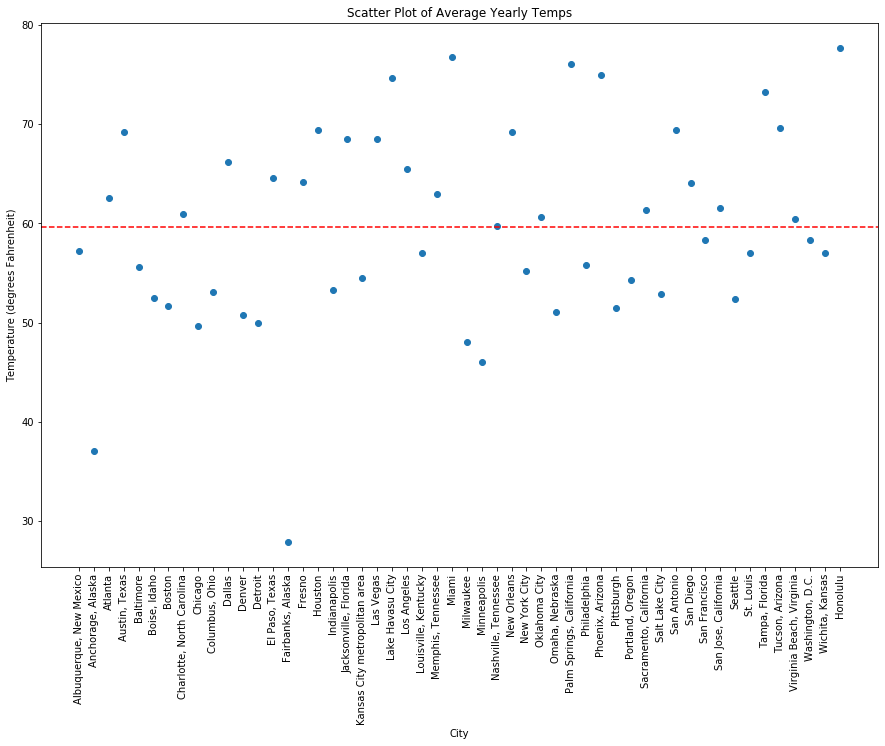

<Figure size 1440x1440 with 0 Axes>

In [104]:
# Create scatter plot of all average yearly temps for US cities
# Mean value is shown in red
plt.figure(figsize=(15,10))
plt.scatter(x=us.City, y=us.Avg_Temp_Yr)
plt.title('Scatter Plot of Average Yearly Temps')
plt.xlabel('City')
plt.xticks(rotation = 'vertical')
plt.ylabel('Temperature (degrees Fahrenheit)')
plt.axhline(mean_temp, color='r', linestyle='--', label = 'Avg')
plt.figure(figsize=(20,20))
plt.show()

## Data Visualization #5 - Single df

In [83]:
# final query
cursor = conn.cursor()
df5 = pd.read_sql_query("SELECT * FROM AverageTemperatures;", conn)

In [84]:
df5.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg_Temp_Yr,Continent
0,Algeria,Algiers,52.16,53.42,55.04,58.46,63.86,70.34,76.28,77.36,73.76,66.92,59.36,53.78,63.32,Africa
1,Algeria,Tamanrasset,55.04,59.00,64.58,71.96,78.98,84.02,83.66,82.76,79.70,72.32,63.14,57.02,71.06,Africa
2,Algeria,Reggane,60.80,64.76,73.58,82.22,89.96,97.52,103.64,101.12,95.90,84.56,71.60,64.04,82.94,Africa
3,Angola,Luanda,80.06,83.30,83.48,82.76,80.60,75.02,71.78,71.78,74.30,77.36,80.06,80.42,78.44,Africa
4,Benin,Cotonou,81.14,83.30,84.02,83.48,82.04,79.70,78.44,78.08,78.80,80.06,81.68,81.14,80.96,Africa


In [85]:
df5['Country'].value_counts()

United States    52
Argentina        17
Canada           15
Brazil           14
Russia           12
                 ..
Lithuania         1
Luxembourg        1
Cape Verde        1
Slovenia          1
Denmark           1
Name: Country, Length: 173, dtype: int64

In [86]:
# empty lists that query will append to
continents = []
entries = []
for n, c in cursor.execute("SELECT count(*), Continent FROM AverageTemperatures GROUP BY Continent"):
    continents.append(c)
    entries.append(n)

In [87]:
continents

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [88]:
entries

[109, 75, 62, 98, 26, 54]

In [89]:
# create column names for df
columns = ['Continent', 'Entries']

In [90]:
# create df out of lists 
final_df = pd.DataFrame(list(zip(continents, entries)), columns = columns)

In [91]:
# view df
final_df

,Continent,Entries
0,Africa,109
1,Asia,75
2,Europe,62
3,North America,98
4,Oceania,26
5,South America,54


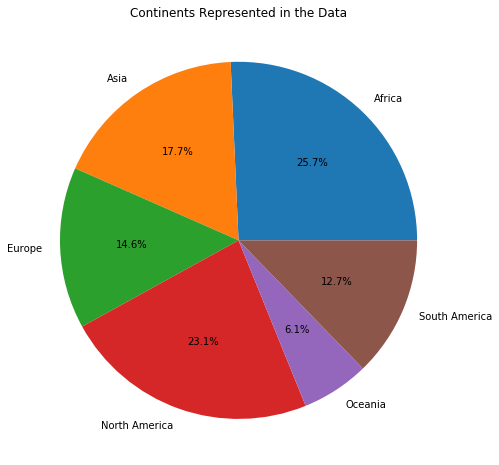

In [106]:
# Pie Chart to show how prevelant each continent is within the dataframe
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.pie(final_df['Entries'], labels=final_df['Continent'], autopct='%0.1f%%')
plt.title("Continents Represented in the Data")
plt.show()

In [107]:
# Be sure to close the connection
# conn.close()